 ### Choose a dataset of your preference.
### Apply a variety of classification algorithms, including Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM),
### K-Nearest Neighbors (KNN), Decision Tree (DT), Random Forest (RF),and AdaBoost.                     
### Assess their performance using classification metrics.
### Compare the performance of the entire classification algorithm.

In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('winequality-red.csv')

### Exploratory Data Analysis

In [53]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
df.shape

(1599, 12)

In [55]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [57]:
df.isnull().values.any()

False

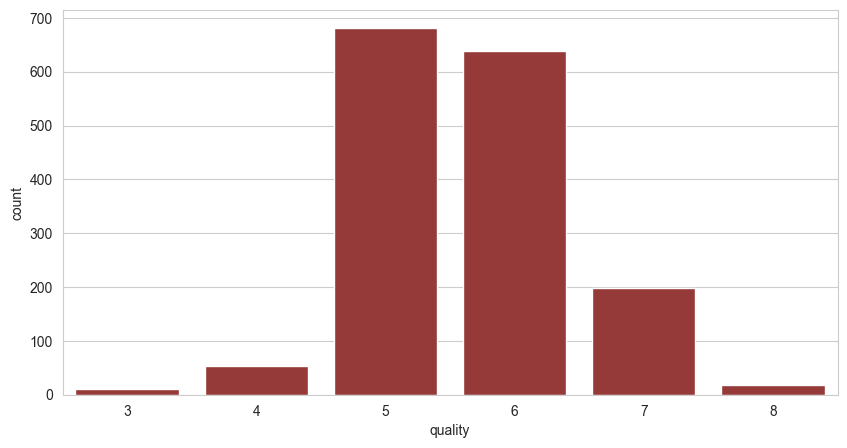

In [119]:
#Plotting Count for Qualities
plt.figure(figsize=(10,5))
sns.countplot(x='quality',data=df,color='Brown')
plt.show()

In [59]:
#Finding Correlation among the variables¶
df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


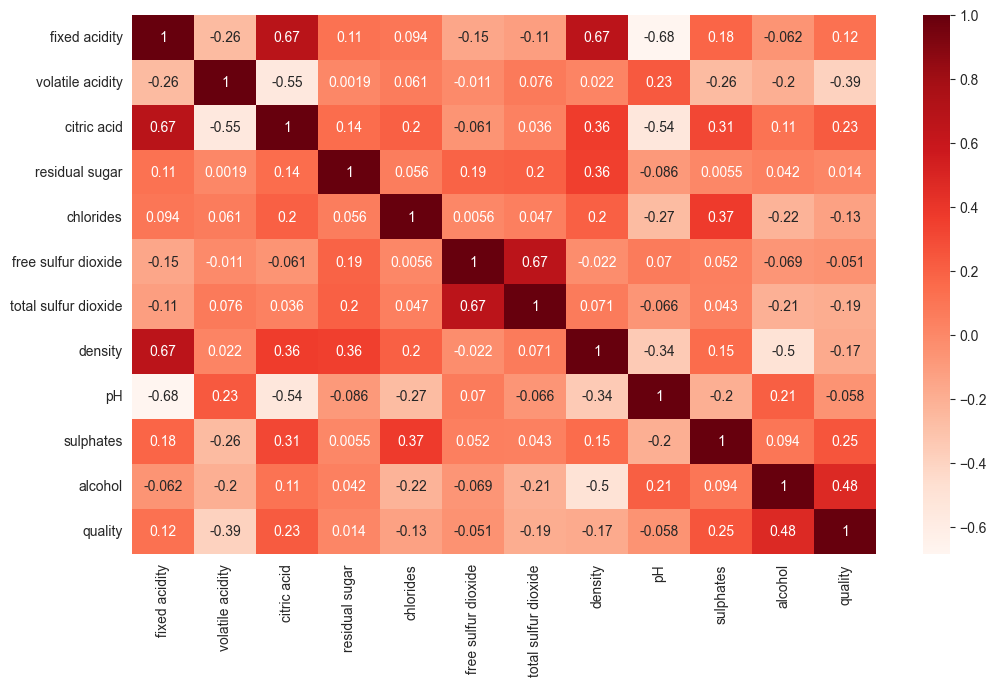

In [60]:
# Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

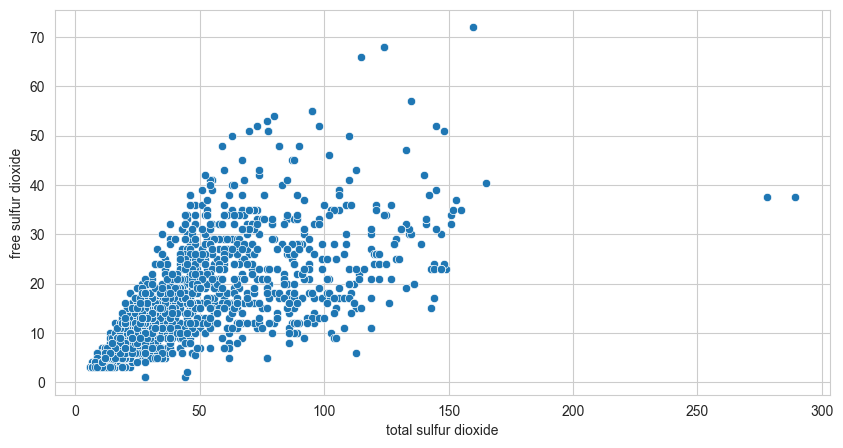

In [61]:
# Plot b/w total sulphur dioxide and free sulphur dioxide¶
plt.figure(figsize=(10,5))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

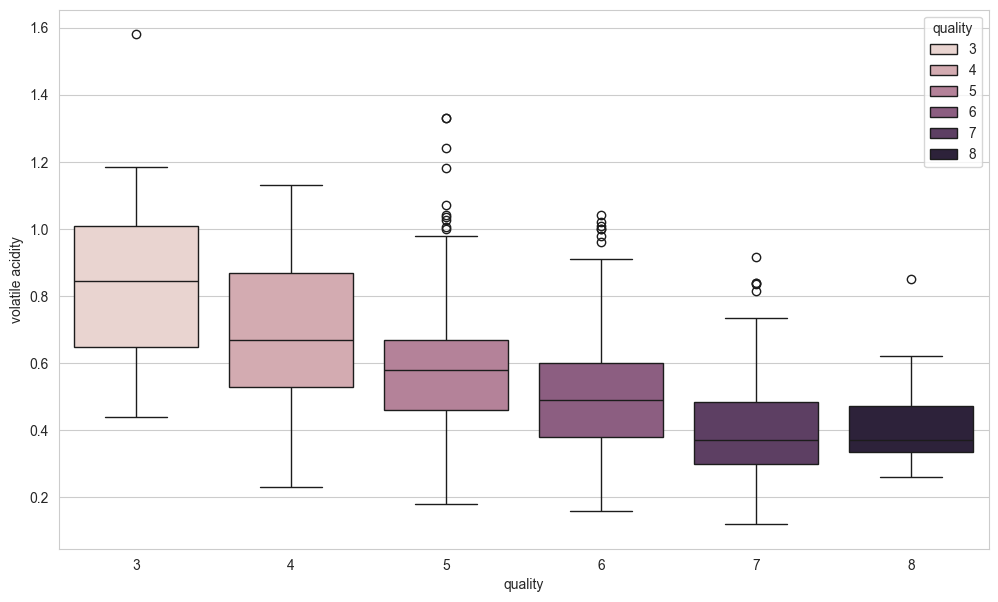

In [62]:
# boxplot
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

<Axes: xlabel='density', ylabel='fixed acidity'>

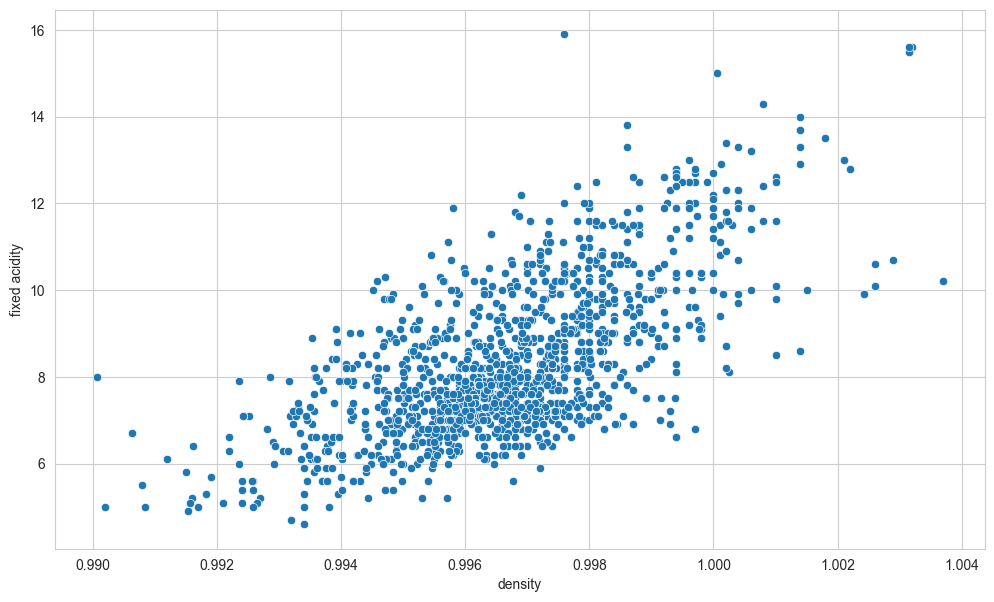

In [63]:
 # density of wine varies with the fixed acidity¶
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

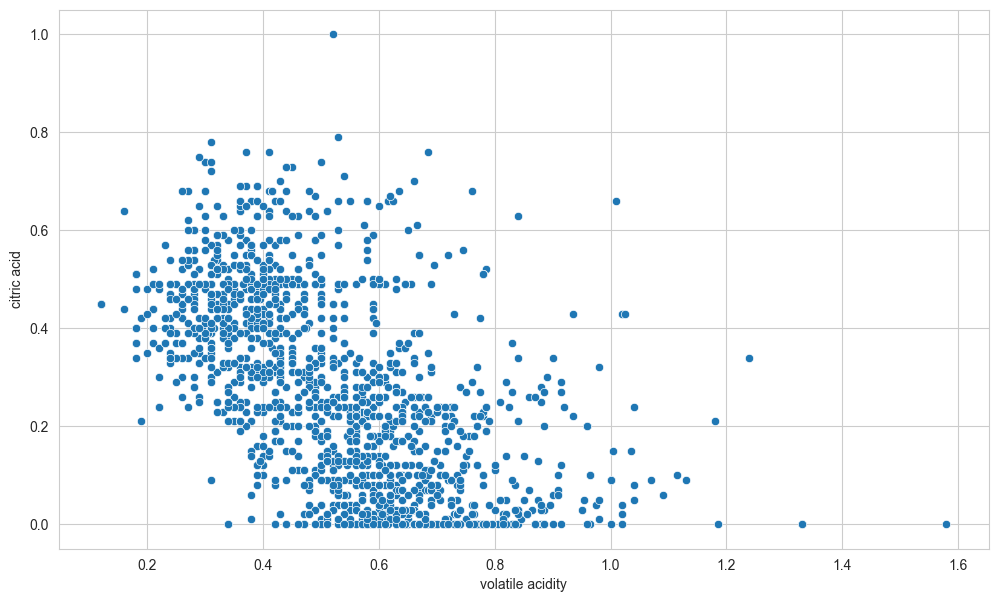

In [64]:
#volatile acidity of wine changes with respect to citric acid¶
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

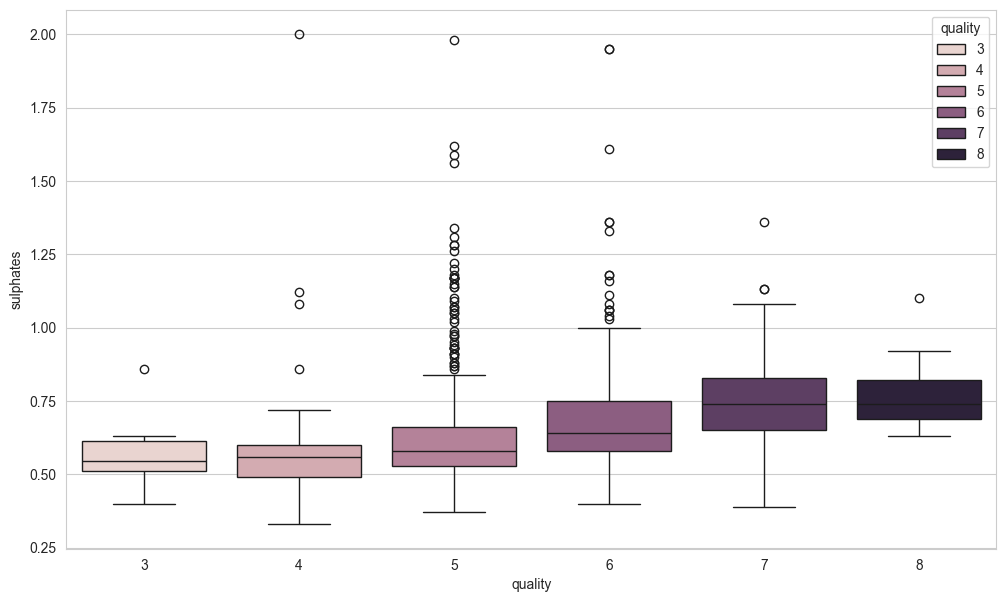

In [65]:
# quality of wine varies in according with sulphates in it¶
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='sulphates',data=df,hue='quality')
plt.show()

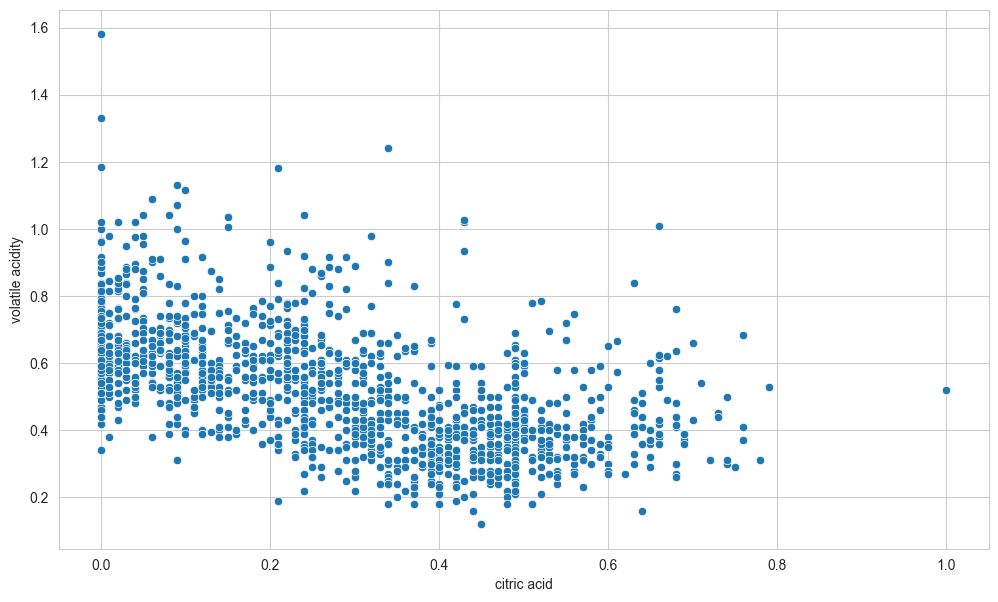

In [66]:
#citric acid and volatile acidity¶
plt.figure(figsize=(12,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

In [67]:
# Data Preprocessing¶
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()

In [68]:
# Splitting the dataset as 20% for testing and 80% for training¶
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0)
# Preparing for Models
model_comp={}

In [87]:
# Logistic Regression
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print("Accuracy:",accuracy_score(ytest,y1))
print("F1_score:",f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

Accuracy: 0.625
F1_score: 0.5931778739355794
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.77      0.70       135
           6       0.62      0.65      0.64       142
           7       0.33      0.11      0.17        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.27      0.26      0.25       320
weighted avg       0.58      0.62      0.59       320



In [88]:
# Decision Tree
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print("Accuracy:",accuracy_score(ytest,y2))
print("F1_score:",f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

Accuracy: 0.690625
F1_score: 0.6932762076496451
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.36      0.35        11
           5       0.77      0.75      0.76       135
           6       0.74      0.68      0.71       142
           7       0.48      0.74      0.58        27
           8       0.00      0.00      0.00         3

    accuracy                           0.69       320
   macro avg       0.39      0.42      0.40       320
weighted avg       0.70      0.69      0.69       320



In [89]:
# RandomForest
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print("Accuracy:",accuracy_score(ytest,y3))
print("F1_score:",f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

Accuracy: 0.709375
F1_score: 0.6931659342569144
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.79      0.77       135
           6       0.70      0.75      0.73       142
           7       0.52      0.52      0.52        27
           8       0.00      0.00      0.00         3

    accuracy                           0.71       320
   macro avg       0.33      0.34      0.34       320
weighted avg       0.68      0.71      0.69       320



In [90]:
# KNN
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print("Accuracy:",accuracy_score(ytest,y4))
print("F1_score:",f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

Accuracy: 0.625
F1_score: 0.6101330372686371
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.74      0.70       135
           6       0.63      0.62      0.63       142
           7       0.46      0.44      0.45        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.29      0.30      0.30       320
weighted avg       0.60      0.62      0.61       320



In [91]:
# SVC
s=SVC()
s.fit(xtrain,ytrain)
y5=s.predict(xtest)

print("Accuracy:",accuracy_score(ytest,y5))
print("F1_score:",f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(y5,ytest),f1_score(ytest,y5,average='weighted')]

Accuracy: 0.65
F1_score: 0.6024744814931203
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.81      0.73       135
           6       0.63      0.70      0.66       142
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.22      0.25      0.23       320
weighted avg       0.56      0.65      0.60       320



In [92]:
# Naive Bayes
nb = GaussianNB()
nb.fit(xtrain, ytrain)  
y_nb = nb.predict(xtest)  

print("Accuracy:", accuracy_score(ytest, y_nb))
print("F1 Score:", f1_score(ytest, y_nb, average='weighted'))
print(classification_report(ytest, y_nb))

model_comp['naive_bayes'] = [accuracy_score(ytest, y_nb), f1_score(ytest, y_nb, average='weighted')]

Accuracy: 0.540625
F1 Score: 0.5541155772779046
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.69      0.63      0.66       135
           6       0.60      0.51      0.56       142
           7       0.27      0.56      0.37        27
           8       0.00      0.00      0.00         3

    accuracy                           0.54       320
   macro avg       0.26      0.28      0.26       320
weighted avg       0.58      0.54      0.55       320



In [93]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100)  
ada.fit(xtrain, ytrain) 
y_ada = ada.predict(xtest)  

print("Accuracy:", accuracy_score(ytest, y_ada))
print("F1 Score:", f1_score(ytest, y_ada, average='weighted'))
print(classification_report(ytest, y_ada))

model_comp['adaboost'] = [accuracy_score(ytest, y_ada), f1_score(ytest, y_ada, average='weighted')]


Accuracy: 0.565625
F1 Score: 0.5519858127221988
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.76      0.68       135
           6       0.61      0.50      0.55       142
           7       0.26      0.26      0.26        27
           8       0.00      0.00      0.00         3

    accuracy                           0.57       320
   macro avg       0.25      0.25      0.25       320
weighted avg       0.55      0.57      0.55       320



In [112]:
# Model Comparison on basis of Accuracy
# Most accuracy is in the last
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('Accuracy',ascending=True)
print(df1)

                     Accuracy  F1_score
naive_bayes          0.540625  0.554116
adaboost             0.565625  0.551986
logistic regression  0.625000  0.593178
KNN                  0.625000  0.610133
svc                  0.650000  0.602474
decision tree        0.690625  0.693276
Random forest        0.709375  0.693166
